<a href="https://colab.research.google.com/github/Labans-lab/AI-Tools-Assignment/blob/main/AI_Practical_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI Practical Implementation (50%)
**Author:** [Your Name]  
**Course:** AI Fundamentals

This notebook covers three tasks:
- **Task 1:** Classical ML with Scikit-learn (Iris Dataset)
- **Task 2:** Deep Learning with TensorFlow (MNIST Dataset)
- **Task 3:** NLP with spaCy (Amazon Reviews)


In [1]:
# ================================================================
# 🔹 Task 1: Classical ML with Scikit-learn (Iris Dataset)
# ================================================================
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print('Missing values before handling:\n', df.isnull().sum())
df.fillna(df.mean(), inplace=True)

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('\n--- Evaluation Metrics ---')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average="weighted"))
print('Recall:', recall_score(y_test, y_pred, average="weighted"))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Missing values before handling:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

--- Evaluation Metrics ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.8960 - loss: 0.3435 - val_accuracy: 0.9854 - val_loss: 0.0468
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9836 - loss: 0.0500 - val_accuracy: 0.9892 - val_loss: 0.0332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9899 - val_loss: 0.0293
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.9909 - val_loss: 0.0283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9898 - val_loss: 0.0316
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9851 - loss: 0.0418

 Test Accuracy: 98.98%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


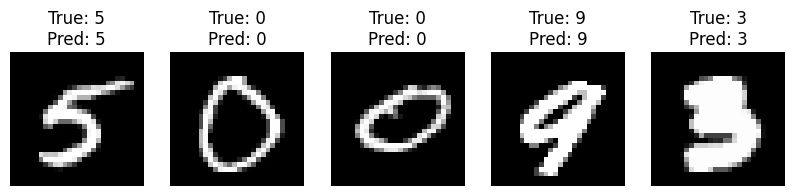

In [1]:
# ================================================================
# 🔹 Task 2: Deep Learning with TensorFlow (MNIST Dataset)
# ================================================================
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n Test Accuracy: {test_acc*100:.2f}%')

indices = np.random.choice(len(x_test), 5)
sample_images = x_test[indices]
sample_labels = y_test[indices]
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f'True: {sample_labels[i]}\nPred: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()

In [2]:
# ================================================================
#  Task 3: NLP with spaCy (Amazon Reviews)
# ================================================================
!pip install -q spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load('en_core_web_sm')

reviews = [
    'I love my new Samsung Galaxy phone! The camera is amazing.',
    'The Apple MacBook is overpriced but the performance is great.',
    'My Sony headphones stopped working after 2 weeks.',
]

for review in reviews:
    doc = nlp(review)
    print(f'\n Review: {review}')
    print(' Entities (NER):')
    for ent in doc.ents:
        print(f' - {ent.text} ({ent.label_})')

    positive_words = ['love', 'great', 'amazing', 'good', 'excellent']
    negative_words = ['bad', 'poor', 'overpriced', 'stopped', 'broken']
    review_lower = review.lower()

    sentiment = 'Positive' if any(w in review_lower for w in positive_words) else \
                'Negative' if any(w in review_lower for w in negative_words) else 'Neutral'

    print(f' Sentiment: {sentiment}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

 Review: I love my new Samsung Galaxy phone! The camera is amazing.
 Entities (NER):
 - Samsung Galaxy (ORG)
 Sentiment: Positive

 Review: The Apple MacBook is overpriced but the performance is great.
 Entities (NER):
 - The Apple MacBook (ORG)
 Sentiment: Positive

 Review: My Sony headphones stopped working after 2 weeks.
 Entities (NER):
 - Sony (ORG)
 - 2 weeks (DATE)
 Sentiment: Negative
